# Sentiment Analysis of Yelp Reviews Dataset

### Dataset Description:
The Dataset contains 10,000 Yelp reviews from the customer. The following are the dataset attributes:
1. business_id (ID for different business reviews)
2. date (review posting date)
3. review_id (ID for each review)
4. stars (rating of business in 1-5 range)
5. text (text of each review)
6. type (type of text)
7. used_id (ID of the user)
8. cool/useful/funny (comments of reviews)

### Purpose of analysis:
The purpose of this analysis is to apply sentiment analysis technique on the Yelp review dataset from the customers and predict whether the review is negative or positive. To do this task, we will be performing three predictive Machine Learning algorithm to build model. In the conclusion, we will identifying which model is best for sentiment reviews.

*** This dataset has been taken from Kaggle. You can find the dataset in the following link:
    https://www.kaggle.com/omkarsabnis/sentiment-analysis-on-the-yelp-reviews-dataset/data   ***
    
The following steps will be followed for the analysis:
1. Importing the Dataset
2. Processing the dataset
3. Vectorization
4. Splitting into Train and Test models
5. Applying classification method
6. Conclusion


### Importing important libraries and uploading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing NLTK library for using stop words method
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Mayank(D)/Northeastern University/quater 4/Python for Data science/yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
print(df.shape)

(10000, 10)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB
None


In [5]:
print(df.describe)

<bound method NDFrame.describe of                  business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
5     -yxfBYGB6SEqszmxJxd97A  2007-12-13  m2CKSsepBCoRYWxiRUsxAg      4   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
7     hW0Ne_HTHEAgGF1rAdmR-g  2012-07-12  JL7GXJ9u4YMx7Rzs05NfiQ      4   
8     wNUea3IXZWD63bbOQaOH-g  2012-08-17  XtnfnYmnJYi71yIuGsXIUA      4   
9     nMHhuYan8e3cONo3PornJA  2010-08-11  jJAIXA46pU1swYyRCdfXtQ      5   
10    AsSCv0q_BWqIe3mX2JqsOQ  2010-06-16  E11jzpKz9Kw5K7fuARWfRw      5   
11    e9nN4XxjdHj4qtKCOPq_vg  2011-10-21  3rPt0LxF7rgmEUrznoH22w  

In [6]:
#creating a new column for length of the text
df['text_len'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_len
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


### VIsualising the data

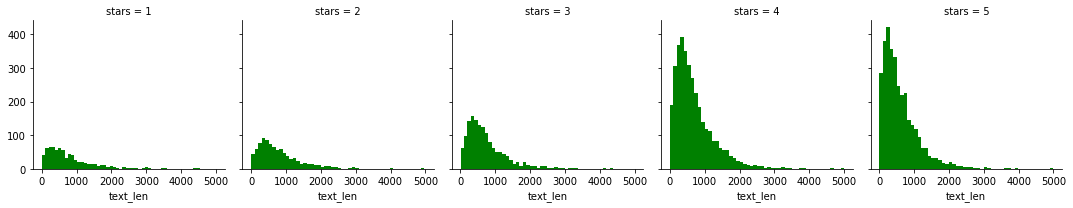

In [7]:
graph1 = sns.FacetGrid(data=df, col='stars')
graph1.map(plt.hist, 'text_len', color = 'green', bins = 50)

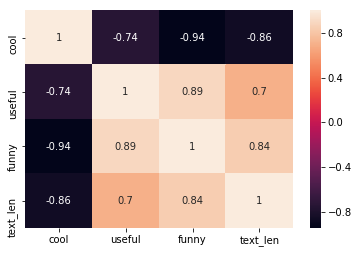

In [8]:
#Grouping the data using start rating and finding if any correlation 
stars = df.groupby('stars').mean()
stars.corr()
sns.heatmap(data = stars.corr(), annot = True)

#### This shows that funny is strongly correlated to useful and useful is strongly correlated to text_len
#### Thus, we can say that longer reviews are more funny and useful

In [9]:
#Preparing for classification
df_class = df[(df['stars']==1) | (df['stars']==5)]
df_class.shape

#putting them in seperate variable
x = df_class['text']
y = df_class['stars']
print(x.head())
print(y.head())

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


In [10]:
#Data cleaning by removing stop words and puntuation
import string
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Performing Vectorization

In [11]:
#Import countVectorizer and define it with a variable. Along with that we will fit it to our review text stored in x
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = text_process).fit(x)
print(len(vectorizer.vocabulary_))

26435


In [13]:
review_0 = x[0]
print(review_0)
vocab_0 = vectorizer.transform([review_0])
print(vocab_0)

print("Following Words back")
print(vectorizer.get_feature_names()[11443])
print(vectorizer.get_feature_names()[22077])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 244)	1
  (0, 1000)	1
  (0, 1505)	1
  (0, 2921)	1
  (0, 4285)	1
  (0, 4388)	2
  (0, 5251)	1
  (0, 7120)	1

In [19]:
#Now applying vectorization to the ful review set which would check the shape of new x
x = vectorizer.transform(x)
print('Shape of Sparse Matrix: ', x.shape)
print('Amount of Non-Zero occurrences: ', x.nnz)

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


In [22]:
# Percentage of non-zero values
density = (100.0 * x.nnz / (x.shape[0] * x.shape[1]))
print("Density = ",density)

Density =  0.2058920276658241


### Splitting the data into train and test

In [24]:
#Splitting the dataset into training data and test data in the proportion of 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

## Applying the classification method
### Multinomial Naive Bayes

In [42]:
#Building the model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

#Testing our model
nb_predict = nb.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, nb_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, nb_predict))  ### The model achieved 93% accuracy. 
                                                  ### However, since we know that there are some bias values, 
                                                  ### so let's just test it on a single review.

#positive single review
pos_review = df_class['text'][59]
pos_review

pos_review_t = vectorizer.transform([pos_review])
nb.predict(pos_review_t)[0]                       ### 5 star rating which is good as expected 


#Negative single review
neg_review = df_class['text'][281]
neg_review

neg_review_t = vectorizer.transform([neg_review])
nb.predict(neg_review_t)[0]                       ### 1 star rating which is fine as expected


[[113  37]
 [ 21 647]]


             precision    recall  f1-score   support

          1       0.84      0.75      0.80       150
          5       0.95      0.97      0.96       668

avg / total       0.93      0.93      0.93       818



1

### K-NN classifier

In [48]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#Testing our model on x_test
knn_predict = knn.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, knn_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, knn_predict))    ### The model achieved 78% accuracy

[[ 12 138]
 [ 10 658]]


             precision    recall  f1-score   support

          1       0.55      0.08      0.14       150
          5       0.83      0.99      0.90       668

avg / total       0.78      0.82      0.76       818



### Support Vector Machine

In [54]:
#Building the model
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

#Testing our model on x_test
svm_predict = svm.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, svm_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, svm_predict))    ### The model achieved 67% accuracy

[[  0 150]
 [  0 668]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       150
          5       0.82      1.00      0.90       668

avg / total       0.67      0.82      0.73       818



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest Classifier

In [60]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Testing our model on x_test
rf_predict = rf.predict(x_test)

#Creating the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, rf_predict))

print('\n')

#Creating the classification report
print(classification_report(y_test, rf_predict))    ### The model achieved 86% accuracy

[[ 68  82]
 [ 21 647]]


             precision    recall  f1-score   support

          1       0.76      0.45      0.57       150
          5       0.89      0.97      0.93       668

avg / total       0.86      0.87      0.86       818



## Conclusion 

#### After applying four machine learning algorithm to our model, we found different accuracy produced through eah of them: <br>

1. MultiNomial Naive Bayes produced 93% accuracy
2. KNN produced 78% accuracy
3. SVM produced 67% accuracy
4. Random Forest produced 86% accuracy

#### By the above analysis, we can say that Naive Bayes and Random forest provides the best model.
#### Among these two algorithms, since Naive Bayes gives the most accurate result, we have tested it on some single positive and single negative reviews which confirms that the model build is almost correct. But, there are some values which does not qualify the model should be because of bias data towards the positive reviews.
